## Anomaly Detection Techniques and Algorithms


## Importing the necessary libraries

In [97]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np   #for linear algebra
import pandas as pd  #for data manipulation,data analysis and data visualization
import matplotlib.pyplot as plt  #data visualization
from sklearn.svm import OneClassSVM #Support vector machine
from sklearn.neighbors import LocalOutlierFactor  #Local Outlier Factor Algorithm
from sklearn.metrics import accuracy_score  # Accuracy_score  for the predictions
from sklearn.metrics import classification_report # classification report of the preedicted values
from sklearn.ensemble import IsolationForest #implementation of the isolation forest algorithm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN  #implementation of the DBSCAN algorithm

## Importing the dataset


In [ ]:
dataset=pd.read_csv("./dataset.csv")
dataset['is_anomaly']=dataset['is_anomaly'].replace(False,0).replace(True,1)
dataset_df = dataset.drop(columns=['is_anomaly'],inplace=False,axis=1)
dataset_anomaly_df=dataset['is_anomaly']



In [55]:
dataset.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,0,44.072500
1,1425008873,41,0,50.709390
2,1425009173,41,0,81.405120
3,1425009473,61,0,39.950367
4,1425009773,44,0,35.350160


In [56]:

print(dataset_df.describe())
dataset_df.shape


          timestamp         value     predicted
count  1.583000e+04  15830.000000  15830.000000
mean   1.427383e+09     85.572205     71.870715
std    1.370962e+06    321.760918     92.450520
min    1.425009e+09      0.000000   -281.389070
25%    1.426196e+09     29.000000     32.919171
50%    1.427383e+09     47.000000     49.771124
75%    1.428570e+09     76.000000     75.948052
max    1.429757e+09  13479.000000   2716.127200


(15830, 3)

In [57]:
print("Total No of Transactions:",len(dataset_df))

Fraud =dataset[dataset['is_anomaly']==True]
print("No of Anomalous Transactions:",len(Fraud))

Valid = dataset[dataset['is_anomaly']==False]
print("No of Valid Transactions:",len(Valid))

outlier_fraction = len(Fraud)/float(len(dataset))
valid_fraction = len(Valid)/float(len(dataset))
print("Percentage of Anomalous Transactions:",round((outlier_fraction*100),3))
print("Percentage of Valid Transactions:",round((valid_fraction*100),3))

Total No of Transactions: 15830
No of Anomalous Transactions: 776
No of Valid Transactions: 15054
Percentage of Anomalous Transactions: 4.902
Percentage of Valid Transactions: 95.098


## Visualization of the dataset

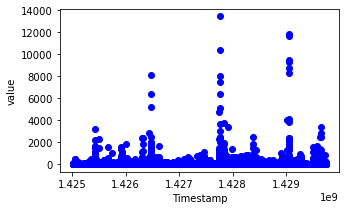

In [104]:
plt.scatter(dataset["timestamp"],dataset["value"],c="b")
plt.xlabel("Timestamp")
plt.ylabel("value")
plt.show()

## Support Vector Machine

In [59]:
model_SVM=OneClassSVM(kernel='linear',degree=3,nu=0.1,max_iter=-1).fit(dataset_df)


In [60]:
Y_prediction_SVM=model_SVM.predict(dataset_df)


In [61]:
Y_prediction_SVM[Y_prediction_SVM==1]=0
Y_prediction_SVM[Y_prediction_SVM==-1]=1
total_errors_SVM=(Y_prediction_SVM!=dataset_anomaly_df).sum()
print("Total predicted errors in the dataset:",total_errors_SVM)
print("The accuracy score of the model :",accuracy_score(dataset_anomaly_df,Y_prediction_SVM))
print("The classification report of the model :\n",classification_report(dataset_anomaly_df,Y_prediction_SVM))
anomaly_values_SVM=dataset_df.iloc[np.where(Y_prediction_SVM==1)]


Total predicted errors in the dataset: 2216
The accuracy score of the model : 0.8600126342387872
The classification report of the model :
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     15054
           1       0.04      0.09      0.06       776

    accuracy                           0.86     15830
   macro avg       0.50      0.50      0.49     15830
weighted avg       0.91      0.86      0.88     15830



## Visualization 

Text(0.5, 1.0, 'Support Vector Machine')

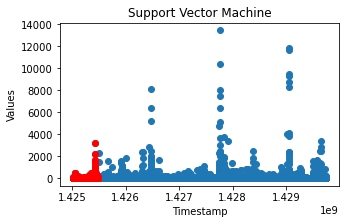

In [62]:
plt.scatter(dataset_df["timestamp"],dataset_df["value"])
plt.scatter(anomaly_values_SVM["timestamp"],anomaly_values_SVM["value"],c="r")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Support Vector Machine")

## Local Outlier Factor

In [63]:
#Defining the Local Outlier Factor Model 
model_LOF=LocalOutlierFactor(n_neighbors=20,algorithm='auto',
                          leaf_size=30,metric='minkowski',p=2,
                          metric_params=None,contamination=0.002)

Y_prediction_LOF=model_LOF.fit_predict(dataset_df) 
scores_prediction_LOF=model_LOF.negative_outlier_factor_

In [64]:
#Reshaping the prediction  values 0 denoting normal data points and 1 denoting the outlier
Y_prediction_LOF[Y_prediction_LOF==1]=0
Y_prediction_LOF[Y_prediction_LOF==-1]=1
total_errors_LOF=(Y_prediction_LOF!=dataset_anomaly_df).sum()
anomaly_values_LOF=dataset_df.iloc[np.where(Y_prediction_LOF==1)] # total anomalous valuesin the dataset
print("Total predicted errors in the dataset:",total_errors_LOF)
print("The accuracy score of the model :",accuracy_score(dataset_anomaly_df,Y_prediction_LOF))
print("The classification report of the model :\n",classification_report(dataset_anomaly_df,Y_prediction_LOF))

Total predicted errors in the dataset: 764
The accuracy score of the model : 0.951737207833228
The classification report of the model :
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     15054
           1       0.69      0.03      0.05       776

    accuracy                           0.95     15830
   macro avg       0.82      0.51      0.51     15830
weighted avg       0.94      0.95      0.93     15830



## Visualization

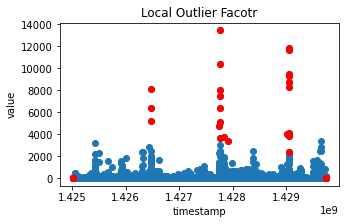

In [65]:
plt.title("Local Outlier Facotr")
plt.scatter(dataset_df["timestamp"],dataset_df["value"])
plt.scatter(anomaly_values_LOF["timestamp"],anomaly_values_LOF["value"],c="r")
plt.xlabel("timestamp")
plt.ylabel("value")
plt.show()



## Isolation Forest

In [66]:
#defining the isolatin forest model
model_Isolation_Forest=IsolationForest(n_estimators=100,contamination=0.002,
                       random_state=42, verbose=0)
Y_prediction_Isolation_Forest=model_Isolation_Forest.fit_predict(dataset_df) 
scores_prediction_Isolation_Forest=model_Isolation_Forest.decision_function(dataset_df)

In [67]:
#Reshaping the values 
Y_prediction_Isolation_Forest[Y_prediction_Isolation_Forest==1]=0
Y_prediction_Isolation_Forest[Y_prediction_Isolation_Forest==-1]=1
total_errors_Isolation_Forest=(Y_prediction_Isolation_Forest!=dataset_anomaly_df).sum() #calculating the total errors 
anomaly_values_Isolation_Forest=dataset_df.iloc[np.where(Y_prediction_Isolation_Forest==1)]
print("Total predicted errors in the dataset:",total_errors_Isolation_Forest)
print("The accuracy score of the model :",accuracy_score(dataset_anomaly_df,Y_prediction_Isolation_Forest))
print("The classification report of the model :\n",classification_report(dataset_anomaly_df,Y_prediction_Isolation_Forest))

Total predicted errors in the dataset: 762
The accuracy score of the model : 0.9518635502210991
The classification report of the model :
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     15054
           1       0.72      0.03      0.06       776

    accuracy                           0.95     15830
   macro avg       0.84      0.51      0.52     15830
weighted avg       0.94      0.95      0.93     15830



## Visualization


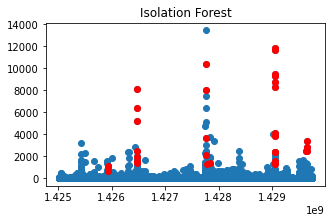

In [68]:
plt.title("Isolation Forest")
plt.scatter(dataset_df["timestamp"],dataset_df["value"])
plt.scatter(anomaly_values_Isolation_Forest["timestamp"],anomaly_values_Isolation_Forest["value"],c="r")
plt.show()


## DBSCAN Algorithm

Compute data proximity from each other using Nearest Neighbours

In [69]:

Neighbors_DBSCAN = NearestNeighbors(n_neighbors=2)
nbrs_parameter=Neighbors_DBSCAN.fit(dataset_df)
distances_parameter,indices_parameter=nbrs_parameter.kneighbors(dataset_df) 

Sorting and plot the distances between the data points

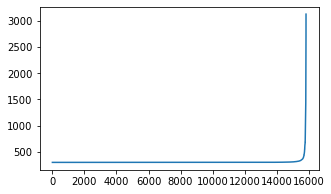

In [70]:
distances_parameter = np.sort(distances_parameter, axis = 0) # sorting the distances
distances_parameter = distances_parameter[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances_parameter) # plotting the distances
plt.show() 

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 8.

We now have our two parameters as:

MinPoints = 2
Eps = 550


## Implementing the DBSCAN model

In [71]:
model_DBSCAN = DBSCAN(eps = 400, min_samples = 2)
Y_prediction_DBSCAN=model_DBSCAN.fit_predict(dataset_df)
labels_DBSCAN = model_DBSCAN.labels_ 

In [72]:
clusters_DBSCAN=len(np.unique(labels_DBSCAN))-1
anomaly_score_DBSCAN=list(labels_DBSCAN).count(-1)
print("Total Clusters formed:",clusters_DBSCAN)
print("Total Anomalies Observed:",anomaly_score_DBSCAN)


Total Clusters formed: 170
Total Anomalies Observed: 156


## Visualization

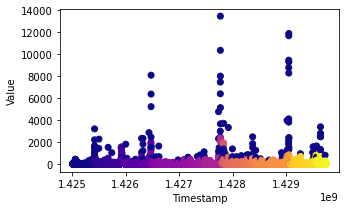

In [73]:
plt.scatter(dataset_df["timestamp"], dataset_df["value"], c = labels_DBSCAN, cmap= "plasma") # plotting the clusters
plt.xlabel("Timestamp") # X-axis label
plt.ylabel("Value") # Y-axis label
plt.show() 

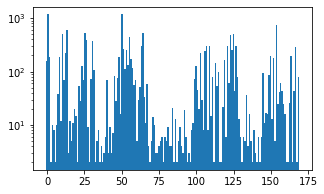

In [74]:
plt.hist(labels_DBSCAN,bins=len(np.unique(labels_DBSCAN)),log=True)
plt.show()

## Statistical Techniques for Anomaly Detection

## Percentile Method

## Loading the dataset

In [75]:
iris_dataset=pd.read_csv("C:\\Users\\HP\\Desktop\\AD Project\\Iris.csv")

In [76]:
iris_dataset.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [77]:
iris_dataset.shape

(150, 6)

## Calculating the minimum and the maximum threshold values

In [78]:
min_threshold,max_threshold=iris_dataset.SepalLengthCm.quantile([0.001,0.999])



## Anomalies with the threshold value < minimum threshold

In [79]:
iris_dataset[(iris_dataset.SepalLengthCm<min_threshold )]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa


## Anomalies wiht the threshold value greater than the maximum Threshold

In [80]:
iris_dataset[(iris_dataset.SepalLengthCm>max_threshold)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica


## Anomaly Detection using Standard Deviation

In [81]:
mean_iris=iris_dataset.PetalLengthCm.mean()

In [82]:
upper_bound=mean_iris+iris_dataset.PetalLengthCm.std()
upper_bound

5.523087086618931

In [83]:
lower_bound=mean_iris-iris_dataset.PetalLengthCm.std()
lower_bound

1.9942462467144075

In [84]:
iris_dataset[(iris_dataset.PetalLengthCm<lower_bound)| (iris_dataset.PetalLengthCm>upper_bound)]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
135,136,7.7,3.0,6.1,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica


## Anomaly Detection using Z -Score

In [85]:
iris_dataset['zscore']=(iris_dataset.PetalLengthCm-mean_iris)/iris_dataset.PetalLengthCm.std()

In [86]:
iris_dataset.shape

(150, 7)

In [87]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-1.336794
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1.336794
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.393470
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.280118
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1.336794


In [88]:
min_iris=iris_dataset.zscore.min()

In [89]:
max_iris=iris_dataset.zscore.max()

In [90]:
average_zscore=(max_iris-min_iris)/2

In [91]:
upper_limit_zscore=(iris_dataset.PetalLengthCm+average_zscore)/2
lower_limit_zscore=(average_zscore-iris_dataset.PetalLengthCm)/2

In [92]:
iris_dataset[(iris_dataset.PetalLengthCm<lower_limit_zscore)|(iris_dataset.PetalLengthCm>upper_limit_zscore)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
5,6,5.4,3.9,1.7,0.4,Iris-setosa,-1.166767
18,19,5.7,3.8,1.7,0.3,Iris-setosa,-1.166767
20,21,5.4,3.4,1.7,0.2,Iris-setosa,-1.166767
23,24,5.1,3.3,1.7,0.5,Iris-setosa,-1.166767
24,25,4.8,3.4,1.9,0.2,Iris-setosa,-1.053415
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0.816888
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.703536
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.816888
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.930239


## Anomaly detection using Interquartile Range

In [93]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,zscore
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,75.500000,5.843333,3.054000,3.758667,1.198667,-2.043551e-15
std,43.445368,0.828066,0.433594,1.764420,0.763161,1.000000e+00
min,1.000000,4.300000,2.000000,1.000000,0.100000,-1.563497e+00
25%,38.250000,5.100000,2.800000,1.600000,0.300000,-1.223442e+00
50%,75.500000,5.800000,3.000000,4.350000,1.300000,3.351431e-01
75%,112.750000,6.400000,3.300000,5.100000,1.800000,7.602119e-01
max,150.000000,7.900000,4.400000,6.900000,2.500000,1.780377e+00


In [94]:
Q1=iris_dataset.SepalWidthCm.quantile(0.25)
Q3=iris_dataset.SepalWidthCm.quantile(0.75)

In [95]:
IQR=Q3-Q1
lower_IQR_range=Q1-1.5*IQR
upper_IQR_range=Q3+1.5*IQR

In [96]:
iris_dataset[(iris_dataset.SepalWidthCm>upper_IQR_range)|(iris_dataset.SepalWidthCm<lower_IQR_range)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
15,16,5.7,4.4,1.5,0.4,Iris-setosa,-1.280118
32,33,5.2,4.1,1.5,0.1,Iris-setosa,-1.280118
33,34,5.5,4.2,1.4,0.2,Iris-setosa,-1.336794
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,-0.146601
